In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
input_data=pd.read_csv("A.csv")

In [3]:
print(input_data.head())

    metaOne          ts  sensorThree  sensorFour  sensorFive  sensorSix  \
0  15:55:21  2021-01-16          0.0         0.0         0.0       0.00   
1  05:34:03  2021-01-18          0.0         0.0         0.0       0.00   
2  14:11:13  2021-01-20          0.0         0.0         0.0       0.00   
3  14:11:49  2021-01-20          0.0         0.0         0.0       0.00   
4  09:41:37  2021-01-21          0.0         0.0         0.0      32.85   

   sensorSeven  
0         0.00  
1         0.00  
2         0.00  
3         0.00  
4        25.04  


In [5]:
input_data=input_data[input_data['sensorFour'].notna()]
input_data=input_data[input_data['sensorFour']>0]

input_data=input_data[input_data['sensorThree'].notna()]
input_data=input_data[input_data['sensorThree']>0]

input_data=input_data[input_data['sensorFive'].notna()]
input_data=input_data[input_data['sensorFive']>0]

input_data=input_data[input_data['sensorSix'].notna()]
input_data=input_data[input_data['sensorSix']>0]

input_data=input_data[input_data['sensorSeven'].notna()]
input_data=input_data[input_data['sensorSeven']>0]

print(input_data.head())


     metaOne          ts  sensorThree  sensorFour  sensorFive  sensorSix  \
14  13:53:47  2021-01-19         25.0        50.0       100.0       50.0   
15  13:56:49  2021-01-19         25.0        50.0       100.0       50.0   
16  14:02:49  2021-01-19         25.0        50.0       100.0       50.0   
17  14:01:19  2021-01-19         25.0        50.0       100.0       50.0   
18  13:49:00  2021-01-19         25.0        50.0       100.0       50.0   

    sensorSeven  
14         22.0  
15         22.0  
16         22.0  
17         22.0  
18         22.0  


In [6]:
import datetime as dt
input_data['ts']=pd.to_datetime(input_data['ts'])
input_data['ts']=input_data['ts'].map(dt.datetime.toordinal)

input_data['metaOne']=pd.to_timedelta(input_data['metaOne'])
input_data['metaOne']=input_data['metaOne'].dt.total_seconds()


In [6]:
print(input_data.head())

    metaOne      ts  sensorThree  sensorFour  sensorFive  sensorSix  \
14  50027.0  737809         25.0        50.0       100.0       50.0   
15  50209.0  737809         25.0        50.0       100.0       50.0   
16  50569.0  737809         25.0        50.0       100.0       50.0   
17  50479.0  737809         25.0        50.0       100.0       50.0   
18  49740.0  737809         25.0        50.0       100.0       50.0   

    sensorSeven  
14         22.0  
15         22.0  
16         22.0  
17         22.0  
18         22.0  


In [7]:
x=input_data[["metaOne","ts","sensorFive","sensorSix","sensorSeven"]].values
y=input_data[["sensorThree","sensorFour"]].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [9]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)

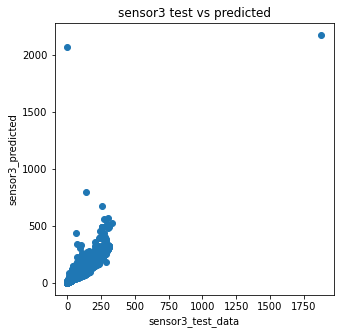

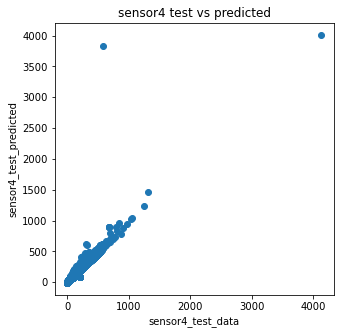

In [19]:
plt.figure(figsize=(5,5))
plt.xlabel("sensor3_test_data")
plt.ylabel("sensor3_predicted")
plt.title("sensor3 test vs predicted")
plt.scatter(y_test[:,0],y_pred[:,0])


plt.figure(figsize=(5,5))
plt.xlabel("sensor4_test_data")
plt.ylabel("sensor4_test_predicted")
plt.title("sensor4 test vs predicted")
plt.scatter(y_test[:,1],y_pred[:,1])
y_train_pred=ml.predict(x_train)


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
    
def printMetrics(y_test, y_pred, y_train, y_train_pred):

    
    print("Mean absolute Testing error in Sensor3: ",mean_absolute_error(y_test[:,0], y_pred[:,0]))
    print("Mean absolute Training error in Sensor3: ",mean_absolute_error(y_train[:,0], y_train_pred[:,0]))
    print("\n")

    
    print("Mean Squared Testing error in Sensor3: ",mean_squared_error(y_test[:,0], y_pred[:,0]))
    print("Mean Squared Training error in Sensor3: ",mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    print("\n")

   
    print("Percentage Mean absolute percentage Testing error in Sensor3: ",mean_absolute_percentage_error(y_test[:,0],y_pred[:,0])*100,"%")
    print("Percentage Mean absolute Testing error in Sensor3: ",mean_absolute_percentage_error(y_train[:,0], y_train_pred[:,0])*100,"%")
    print("\n\n\n")



    print("Mean absolute Testing error in Sensor4: ",mean_absolute_error(y_test[:,1], y_pred[:,1]))
    print("Mean absolute Training error in Sensor4: ",mean_absolute_error(y_train[:,1], y_train_pred[:,1]))
    print("\n")
    print("Mean Squared Testing error in Sensor4: ",mean_squared_error(y_test[:,1], y_pred[:,1]))
    print("Mean Squared Training error in Sensor4: ",mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    print("\n")
    print("Percentage Mean absolute percentage Testing error in Sensor4: ",mean_absolute_percentage_error(y_test[:,1],y_pred[:,1])*100,"%")
    print("Percentage Mean absolute Testing error in Sensor3: ",mean_absolute_percentage_error(y_train[:,1], y_train_pred[:,1])*100,"%")


In [12]:
printMetrics(y_test, y_pred, y_train, y_train_pred)

Mean absolute Testing error in Sensor3:  4.209508008217798
Mean absolute Training error in Sensor3:  4.210327848548245


Mean Squared Testing error in Sensor3:  45.824484503510035
Mean Squared Training error in Sensor3:  50.077082032220744


Percentage Mean absolute percentage Testing error in Sensor3:  9.449247831280656 %
Percentage Mean absolute Testing error in Sensor3:  9.335065538548653 %




Mean absolute Testing error in Sensor4:  4.174639113974553
Mean absolute Training error in Sensor4:  4.181257782849747


Mean Squared Testing error in Sensor4:  45.65302941964942
Mean Squared Training error in Sensor4:  46.21999700937912


Percentage Mean absolute percentage Testing error in Sensor4:  7.320993319356896 %
Percentage Mean absolute Testing error in Sensor3:  7.331390027469381 %


In [13]:
f=1211103  # put f=any arbitrary row number and compare the predicted value vs actual value
print("predicted sensor3, sensor4 value: ", ml.predict([[input_data.iloc[f,0],input_data.iloc[f,1],input_data.iloc[f,4],input_data.iloc[f,5],input_data.iloc[f,6]]]))
print("Actual sensor3, sensor4 value: ",input_data.iloc[f,2],input_data.iloc[f,3])

predicted sensor3, sensor4 value:  [[114.28976727 197.16342292]]
Actual sensor3, sensor4 value:  124.0 204.0


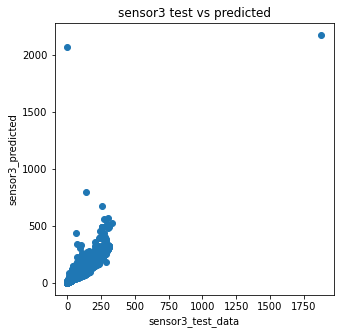

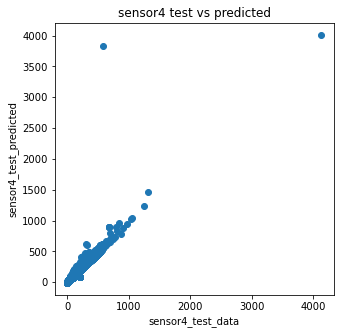

In [14]:
from sklearn.linear_model import Ridge
ml= Ridge(alpha = 0.01)
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
y_train_pred=ml.predict(x_train)


plt.figure(figsize=(5,5))
plt.xlabel("sensor3_test_data")
plt.ylabel("sensor3_predicted")
plt.title("sensor3 test vs predicted")
plt.scatter(y_test[:,0],y_pred[:,0])


plt.figure(figsize=(5,5))
plt.xlabel("sensor4_test_data")
plt.ylabel("sensor4_test_predicted")
plt.title("sensor4 test vs predicted")
plt.scatter(y_test[:,1],y_pred[:,1])

In [15]:
printMetrics(y_test, y_pred, y_train, y_train_pred)

Mean absolute Testing error in Sensor3:  4.209508008219055
Mean absolute Training error in Sensor3:  4.210327848549413


Mean Squared Testing error in Sensor3:  45.82448450349886
Mean Squared Training error in Sensor3:  50.0770820322213


Percentage Mean absolute percentage Testing error in Sensor3:  9.449247831293935 %
Percentage Mean absolute Testing error in Sensor3:  9.335065538561995 %




Mean absolute Testing error in Sensor4:  4.174639113975814
Mean absolute Training error in Sensor4:  4.181257782851005


Mean Squared Testing error in Sensor4:  45.65302941964102
Mean Squared Training error in Sensor4:  46.219997009378964


Percentage Mean absolute percentage Testing error in Sensor4:  7.320993319353103 %
Percentage Mean absolute Testing error in Sensor3:  7.33139002746539 %


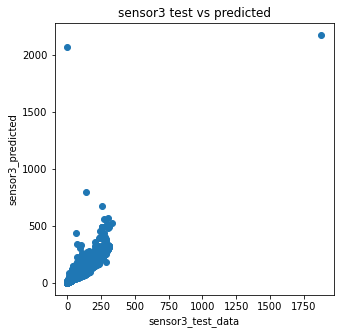

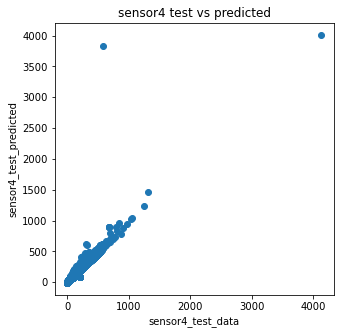

In [16]:
from sklearn.linear_model import Lasso
ml= Lasso(alpha = 0.01)
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
y_train_pred=ml.predict(x_train)


plt.figure(figsize=(5,5))
plt.xlabel("sensor3_test_data")
plt.ylabel("sensor3_predicted")
plt.title("sensor3 test vs predicted")
plt.scatter(y_test[:,0],y_pred[:,0])


plt.figure(figsize=(5,5))
plt.xlabel("sensor4_test_data")
plt.ylabel("sensor4_test_predicted")
plt.title("sensor4 test vs predicted")
plt.scatter(y_test[:,1],y_pred[:,1])

In [20]:
printMetrics(y_test, y_pred, y_train, y_train_pred)

Mean absolute Testing error in Sensor3:  4.209433420915061
Mean absolute Training error in Sensor3:  4.210252072220289


Mean Squared Testing error in Sensor3:  45.82428745665257
Mean Squared Training error in Sensor3:  50.07710512268668


Percentage Mean absolute percentage Testing error in Sensor3:  9.449119481620862 %
Percentage Mean absolute Testing error in Sensor3:  9.33494440029782 %




Mean absolute Testing error in Sensor4:  4.174593816438168
Mean absolute Training error in Sensor4:  4.181215789849527


Mean Squared Testing error in Sensor4:  45.653076556004365
Mean Squared Training error in Sensor4:  46.22001558627881


Percentage Mean absolute percentage Testing error in Sensor4:  7.321732648749675 %
Percentage Mean absolute Testing error in Sensor3:  7.332109013627284 %


In [22]:
from scipy import stats
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'